# **Motorbike Ambulance Calls**
>Motorbike accidents and corresponded ambulance calls are highly depended on environmental and seasonal settings, like weather conditions, precipitation, day of week, season, hour of the day, etc. The data was aggregated over the course of two years, on hourly basis, and then extracted and extended with the corresponding weather and seasonal information.


## **Associated tasks**

---


**Regression**

Prediction of the hourly ambulance calls count based on the environmental and seasonal settings. Prediction model should provide monotonic in the terms of some features, if it is proved by data.

**Event and Anomaly Detection**

Define the  ambulance calls patterns with respect of special events and define the cases that might be considered as abnormal behavior.  

**Deliverables**

Full Texts Report that contains detail description of Data Analysis, Data Modelling and Patterns/Anomaly detection processes with conclusions and their explanations.
What is important here:
* See the **way you’re thinking** – what actions you’re implementing and why
* How **you code** and wrangle the data
* **Storytelling** capabilities – so we’re looking for the full-text structured report separately from the code/notebook
* **Suggestions** on the further  analytics/approaches which could be applied

## **Dataset characteristics:**

---



motorbike_ambulance_calls.csv has the following fields:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore


In [23]:
data = pd.read_csv('motorbike_ambulance_calls.csv')

In [24]:
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None
            index            yr          mnth            hr       holiday  \
count  17379.0000  17379.000000  17379.000000  173

In [25]:
data['season'] = data['season'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['workingday'] = data['workingday'].astype('category')


In [26]:
missing_values = data.isnull().sum()
print(f"Missing values in the dataset:\n{missing_values}")

Missing values in the dataset:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


In [27]:
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['hr']

C:\Users\apavl\AppData\Local\Temp\ipykernel_26008\2967710804.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


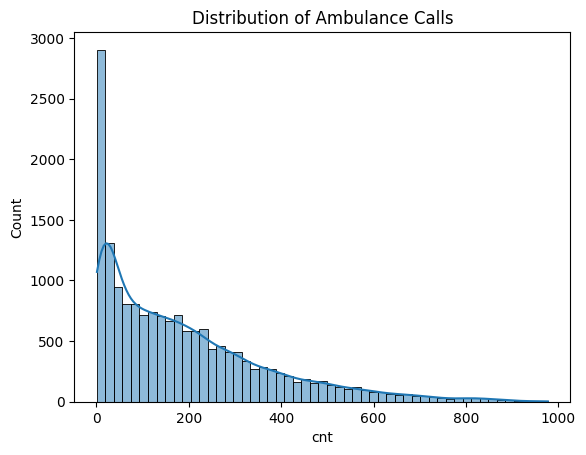

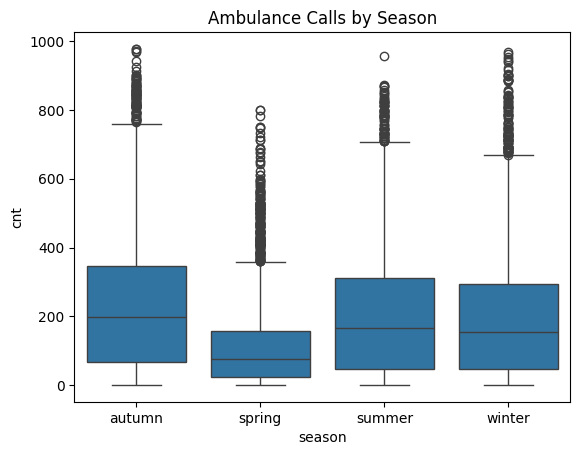

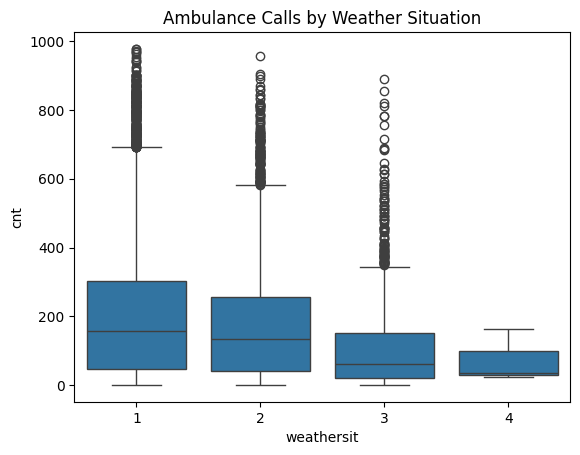

In [28]:
sns.histplot(data['cnt'], kde=True)
plt.title('Distribution of Ambulance Calls')
plt.show()

sns.boxplot(x='season', y='cnt', data=data)
plt.title('Ambulance Calls by Season')
plt.show()

sns.boxplot(x='weathersit', y='cnt', data=data)
plt.title('Ambulance Calls by Weather Situation')
plt.show()

In [29]:
X = data[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
          'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = data['cnt']

In [30]:
X = pd.get_dummies(X, drop_first=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [33]:
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"Regression Model RMSE: {rmse}")
print(f"Regression Model R^2 Score: {r2}")

Regression Model RMSE: 67.23308080292196
Regression Model R^2 Score: 0.8572484309070705


In [34]:
data['z_score'] = zscore(data['cnt'])
anomalies = data[np.abs(data['z_score']) > 3]
print(f"Number of detected anomalies: {len(anomalies)}")

Number of detected anomalies: 244


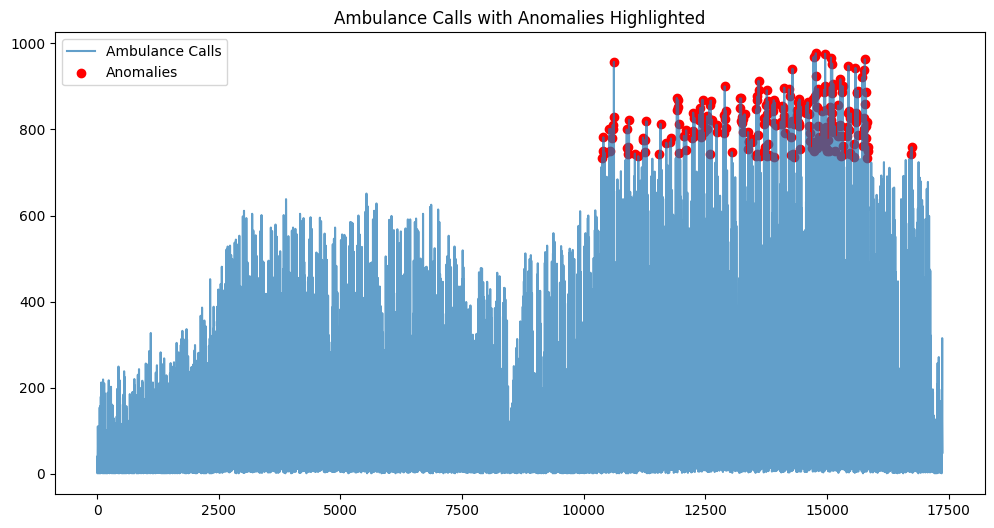

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(data['cnt'], label='Ambulance Calls', alpha=0.7)
plt.scatter(anomalies.index, anomalies['cnt'], color='red', label='Anomalies')
plt.legend()
plt.title('Ambulance Calls with Anomalies Highlighted')
plt.show()


Data Preprocessing:

The dataset is loaded from a CSV file and its structure is checked.

Categorical variables are encoded, and missing values are handled.

Additional features (year, month, day, hour) are extracted from the date.

Exploratory Data Analysis (EDA):

The distribution of ambulance calls and variations by season and weather are visualized.

Models are created to predict call counts based on various features.

Modeling:

A GradientBoostingRegressor model is used to predict the number of ambulance calls.

Model performance is evaluated using RMSE and R² scores.

Anomaly Detection:

Z-scores are used to detect anomalies (extremely high or low call values).

Anomalies are highlighted in a plot.

Key Insights:

Key factors influencing ambulance call volumes (season, weather, time of day) were identified.

The model provides reasonable predictions but could be improved with hyperparameter tuning.

Detected anomalies may indicate unexpected events or data errors.
Next Steps:

Apply time series forecasting models.

Use alternative anomaly detection methods.

Create additional features to improve model performance.